<h4>Step 1 : Load all the libraries</h4>

In [1]:
%pylab inline

# !pip install nltk
# nltk.download()
import nltk
# !pip insatll pandas
import pandas as pd
# !pip install sqlite3
import sqlite3

# !pip install spacy
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Attempt Charting
# !pip install matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)

# !pip install warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


<h4>Step 2:Connecting with Database and get all data from database.</h4>

In [2]:
dat = sqlite3.connect('temp.sqlite3')
query = dat.execute("SELECT * From documents")
cols = [column[0] for column in query.description]
df = pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [3]:
df.to_csv('covid-19.csv')

<p>Information of data that'll show that how many null and non-null values in data but it'll not showing anything because of white spaces in data.</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4180 non-null   object 
 1   publishdate  4180 non-null   object 
 2   url          4180 non-null   object 
 3   text         4180 non-null   object 
 4   sentiment    4180 non-null   float64
 5   polarity     4180 non-null   object 
dtypes: float64(1), object(5)
memory usage: 196.1+ KB


<p>Null values of data which is not giving any null values in data due to white spaces in data.</p>

In [4]:
df.isnull().sum()

title          0
publishdate    0
url            0
text           0
sentiment      0
polarity       0
dtype: int64

<h4>Step 3: Pre-processing</h4>
<p>Removing the all special characters, spaces, hyphens and numbers from data that's mean we want a clean data for extracting the nouns, person names and organizations from data.</p>

In [5]:
# function to preprocess speech
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    text = re.sub('%"','',str(text))
    text = re.sub('/"','',str(text))
    text = re.sub('”','',str(text))
    text = re.sub('©','',str(text))
    text = re.sub('“','',str(text))
    text = re.sub('’','',str(text))
    # removing salutations
    text = re.sub("Mr\.",'Mr',str(text))
    text = re.sub("Mrs\.",'Mrs',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text



In [6]:
# preprocessing speeches apply on text column
df['text_clean'] = df['text'].apply(clean)

In [7]:
df.head()

,title,publishdate,url,text,sentiment,polarity,text_clean
0,How you can help India as it experiences the w...,2021-04-28T05:15:00.000+03:00,https://www.cnn.com/2021/04/27/world/iyw-comba...,(CNN) India is experiencing the world's worst ...,0.035235,Neutral,India is experiencing the world worst coronav...
1,"Pandemic deaths are accelerating, WHO warns, a...",2021-04-20T13:18:00.000+03:00,https://www.cnn.com/2021/04/20/europe/who-glob...,(CNN) Covid-19 infections have been rising at ...,0.076314,Neutral,Covid 19 infections have been rising at an al...
2,"In India’s surge, a religious gathering attend...",2021-05-08T11:00:00.000+03:00,https://www.washingtonpost.com/world/2021/05/0...,NEW DELHI — As coronavirus cases in India shot...,0.055977,Neutral,NEW DELHI As coronavirus cases in India shot u...
3,"In India’s surge, a religious gathering attend...",2021-05-08T16:00:00.000+03:00,https://www.washingtonpost.com/world/2021/05/0...,NEW DELHI — As coronavirus cases in India shot...,0.055977,Neutral,NEW DELHI As coronavirus cases in India shot u...
4,Analysis: India's Covid-19 crisis is a problem...,2021-04-29T08:17:00.000+03:00,https://www.cnn.com/2021/04/29/india/india-cov...,New Delhi (CNN) There is a split scenario unfo...,0.100386,Positive,New Delhi There is a split scenario unfolding...


<h4>Step 3.0: Convert data into sentences.</h4>

In [8]:
# split text column into sentences. So, that we will collect the information that we want from data
def sentences(text):
    # split sentences and questions
    text = re.split('[.?]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

# sentences
df['sent'] = df['text_clean'].apply(sentences)

In [9]:
df.head()

,title,publishdate,url,text,sentiment,polarity,text_clean,sent
0,How you can help India as it experiences the w...,2021-04-28T05:15:00.000+03:00,https://www.cnn.com/2021/04/27/world/iyw-comba...,(CNN) India is experiencing the world's worst ...,0.035235,Neutral,India is experiencing the world worst coronav...,[ India is experiencing the world worst corona...
1,"Pandemic deaths are accelerating, WHO warns, a...",2021-04-20T13:18:00.000+03:00,https://www.cnn.com/2021/04/20/europe/who-glob...,(CNN) Covid-19 infections have been rising at ...,0.076314,Neutral,Covid 19 infections have been rising at an al...,[ Covid 19 infections have been rising at an a...
2,"In India’s surge, a religious gathering attend...",2021-05-08T11:00:00.000+03:00,https://www.washingtonpost.com/world/2021/05/0...,NEW DELHI — As coronavirus cases in India shot...,0.055977,Neutral,NEW DELHI As coronavirus cases in India shot u...,[NEW DELHI As coronavirus cases in India shot ...
3,"In India’s surge, a religious gathering attend...",2021-05-08T16:00:00.000+03:00,https://www.washingtonpost.com/world/2021/05/0...,NEW DELHI — As coronavirus cases in India shot...,0.055977,Neutral,NEW DELHI As coronavirus cases in India shot u...,[NEW DELHI As coronavirus cases in India shot ...
4,Analysis: India's Covid-19 crisis is a problem...,2021-04-29T08:17:00.000+03:00,https://www.cnn.com/2021/04/29/india/india-cov...,New Delhi (CNN) There is a split scenario unfo...,0.100386,Positive,New Delhi There is a split scenario unfolding...,[New Delhi There is a split scenario unfoldin...


<h4>Step 3.1: Extract date from the pulishdate column.</h4>

In [10]:
df['date'] = df['publishdate'].apply(lambda x: x.split('T')[0])

In [11]:
df.head()

,title,publishdate,url,text,sentiment,polarity,text_clean,sent,date
0,How you can help India as it experiences the w...,2021-04-28T05:15:00.000+03:00,https://www.cnn.com/2021/04/27/world/iyw-comba...,(CNN) India is experiencing the world's worst ...,0.035235,Neutral,India is experiencing the world worst coronav...,[ India is experiencing the world worst corona...,2021-04-28
1,"Pandemic deaths are accelerating, WHO warns, a...",2021-04-20T13:18:00.000+03:00,https://www.cnn.com/2021/04/20/europe/who-glob...,(CNN) Covid-19 infections have been rising at ...,0.076314,Neutral,Covid 19 infections have been rising at an al...,[ Covid 19 infections have been rising at an a...,2021-04-20
2,"In India’s surge, a religious gathering attend...",2021-05-08T11:00:00.000+03:00,https://www.washingtonpost.com/world/2021/05/0...,NEW DELHI — As coronavirus cases in India shot...,0.055977,Neutral,NEW DELHI As coronavirus cases in India shot u...,[NEW DELHI As coronavirus cases in India shot ...,2021-05-08
3,"In India’s surge, a religious gathering attend...",2021-05-08T16:00:00.000+03:00,https://www.washingtonpost.com/world/2021/05/0...,NEW DELHI — As coronavirus cases in India shot...,0.055977,Neutral,NEW DELHI As coronavirus cases in India shot u...,[NEW DELHI As coronavirus cases in India shot ...,2021-05-08
4,Analysis: India's Covid-19 crisis is a problem...,2021-04-29T08:17:00.000+03:00,https://www.cnn.com/2021/04/29/india/india-cov...,New Delhi (CNN) There is a split scenario unfo...,0.100386,Positive,New Delhi There is a split scenario unfolding...,[New Delhi There is a split scenario unfoldin...,2021-04-29


<h4>Step 3.2: Extract the "sentence", "date" column and then calculate every sentence length.</h4>

In [12]:
# create a dataframe containing sentences and it's total len
df2 = pd.DataFrame(columns=['Sent','Len','date'])

row_list = []

for i in range(len(df)):
    for sent in df.loc[i,'sent']:
    
        wordcount = len(sent.split())
        date = df.loc[i,'date']

        dict1 = {'Sent':sent,'Len':wordcount,'date':date}
        row_list.append(dict1)
    
df2 = pd.DataFrame(row_list)

In [13]:
df2.head()

,Sent,Len,date
0,India is experiencing the world worst coronav...,8,2021-04-28
1,The country has had more than 17,7,2021-04-28
2,6 million cases since the pandemic began last ...,9,2021-04-28
3,But experts fear the the real number could be...,14,2021-04-28
4,Grieving families are struggling to keep them...,33,2021-04-28


<h4>Step 3.3: Drop all the rows where value of length of sentence is zero.</h4>

In [14]:
#Get the first 10,000 rows from data. It's due to I have less memory in my laptop and it's giving me the MemoryException error.
#So, I need to remove this error that's why I was used the first 9,000 rows and remove the values that have value length is zero.
df3 = df2[ ~ ( df2.Len == 0 ) ].reset_index(drop=True)

In [15]:
df3.head()

,Sent,Len,date
0,India is experiencing the world worst coronav...,8,2021-04-28
1,The country has had more than 17,7,2021-04-28
2,6 million cases since the pandemic began last ...,9,2021-04-28
3,But experts fear the the real number could be...,14,2021-04-28
4,Grieving families are struggling to keep them...,33,2021-04-28


In [16]:
nlp.max_length = 20000000

<h4>Step 4:Person Names Extraction From Data</h4>

In [17]:
def named_entities(sent):
    list_1 = [sent]
    tokens = nlp(str(list_1))
    person_list = []
    for ent in tokens.ents:
        if ent.label_ == 'PERSON':
            person_list.append(ent.text)
    return person_list
df3['person_names'] = df3.loc[:,'Sent'].apply(named_entities)

In [18]:
df4 = df3[ ~ (df3['person_names'].astype(str) == '[]')].reset_index(drop=True)

In [19]:
df4.head()

,Sent,Len,date,person_names
0,Hide Caption 16 of 39 Photos: India Covid 19 ...,25,2021-04-28,[Umar Farooq]
1,Hide Caption 33 of 39 Photos: India Covid 19 ...,32,2021-04-28,[Navaratri celebrations]
2,Hide Caption 37 of 39 Photos: India Covid 19 ...,32,2021-04-28,[Narendra Modi]
3,Help supply oxygen People wait to refill oxyg...,15,2021-04-28,[Covid 19]
4,Vibha concentrates its efforts on improving t...,10,2021-04-28,[Vibha]


In [20]:
# create a dataframe containing sentences and it's total len
df5 = pd.DataFrame(columns=['date','person_names'])

row_list = []

for i in range(len(df4)):
    for person_names in df4.loc[i,'person_names']:
        date = df4.loc[i,'date']
        dict1 = {'person_names':person_names,'date':date}
        row_list.append(dict1)
    
df5 = pd.DataFrame(row_list)

In [21]:
df5.head()

,person_names,date
0,Umar Farooq,2021-04-28
1,Navaratri celebrations,2021-04-28
2,Narendra Modi,2021-04-28
3,Covid 19,2021-04-28
4,Vibha,2021-04-28


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '(2021-04-15, Belmonte)'),
  Text(0.0, 0, '(2021-05-14, Harry)'),
  Text(2.0, 0, '(2021-05-13, Harry)'),
  Text(4.0, 0, '(2021-04-25, Alissa)'),
  Text(6.0, 0, '(2021-04-19, Foster)'),
  Text(8.0, 0, '(2021-04-15, Belmonte)'),
  Text(10.0, 0, '')])

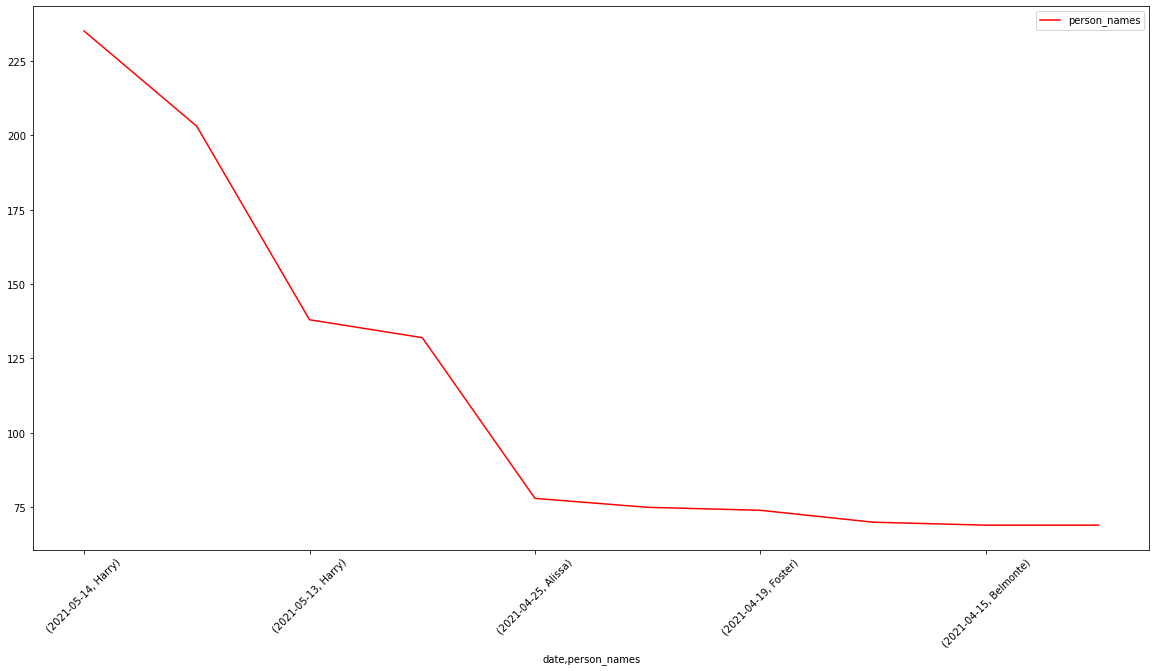

In [22]:
person_frame = df5.groupby(['date','person_names'])['person_names'].count().sort_values(ascending=False)[:10].to_frame()
person_frame.plot(color='red')
plt.xticks(rotation = 45)

In [23]:
person_frame

,,person_names
date,person_names,
2021-05-14,Harry,235
2021-04-25,Biden,203
2021-05-13,Harry,138
2021-05-04,Minna,132
2021-04-25,Alissa,78
2021-05-14,Oprah,75
2021-04-19,Foster,74
2021-04-20,Floyd,70
2021-04-15,Belmonte,69


array([<AxesSubplot:title={'center':'(person_names, 2021-05-14)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-04-25)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-05-13)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-05-04)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-04-19)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-04-20)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-04-15)'}, xlabel='person_names'>,
       <AxesSubplot:title={'center':'(person_names, 2021-05-12)'}, xlabel='person_names'>],
      dtype=object)

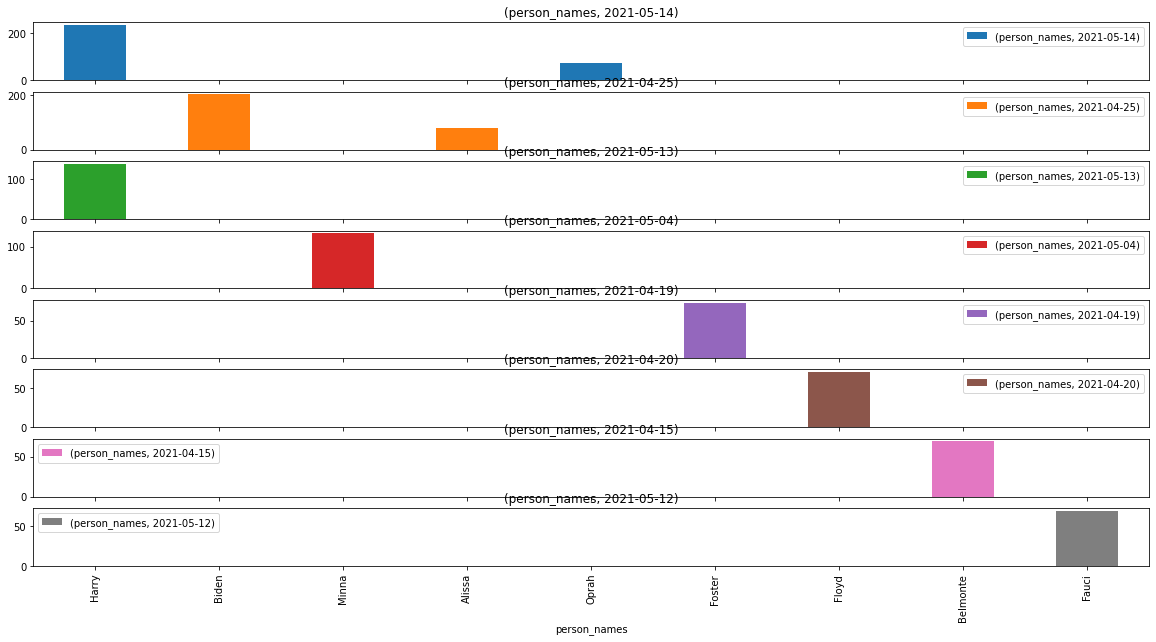

In [24]:
person_frame.unstack(level=0).plot(kind='bar', subplots=True)

array([<AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>,
       <AxesSubplot:xlabel='person_names'>], dtype=object)

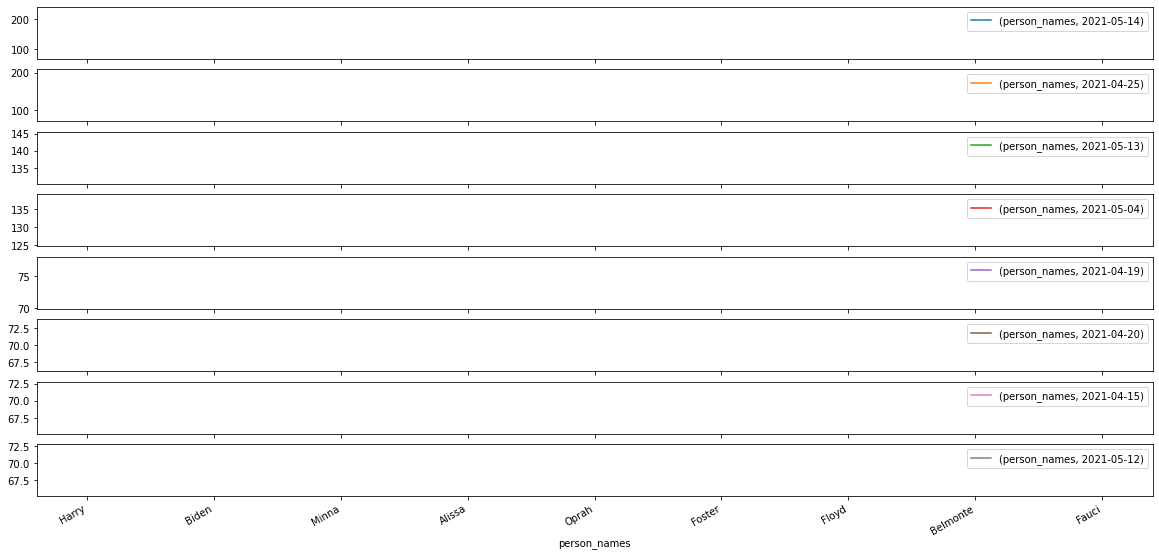

In [25]:
person_frame.unstack(level=0).plot(kind='line', subplots=True)

<h4>Organization Name Extraction From Data</h4>

In [26]:
def org_entities(sent):
    list_1 = [sent]
    tokens = nlp(str(list_1))
    org_list = []
    for ent in tokens.ents:
        if ent.label_ == 'ORG':
            org_list.append(ent.text)
    return org_list
df3['org_names'] = df3.loc[:,'Sent'].apply(org_entities)

In [27]:
df3.head()

,Sent,Len,date,person_names,org_names
0,India is experiencing the world worst coronav...,8,2021-04-28,[],[]
1,The country has had more than 17,7,2021-04-28,[],[]
2,6 million cases since the pandemic began last ...,9,2021-04-28,[],[]
3,But experts fear the the real number could be...,14,2021-04-28,[],[]
4,Grieving families are struggling to keep them...,33,2021-04-28,[],[]


In [28]:
df4 = df3[ ~ (df3['org_names'].astype(str) == '[]')].reset_index(drop=True)

In [29]:
df4.head()

,Sent,Len,date,person_names,org_names
0,Hide Caption 6 of 39 Photos: India Covid 19 c...,32,2021-04-28,[],[Chennai]
1,Hide Caption 9 of 39 Photos: India Covid 19 c...,24,2021-04-28,[],[Siliguri]
2,People also packed the streets of Haridwar fo...,22,2021-04-28,[],[Haridwar]
3,Hide Caption 35 of 39 Photos: India Covid 19 ...,28,2021-04-28,[],[Election Commission]
4,Hide Caption 37 of 39 Photos: India Covid 19 ...,32,2021-04-28,[Narendra Modi],[the Bharatiya Janata Party]


In [30]:
# create a dataframe containing sentences and it's total len
df5 = pd.DataFrame(columns=['date','org_names'])

row_list = []

for i in range(len(df4)):
    for org_names in df4.loc[i,'org_names']:
        date = df4.loc[i,'date']
        dict1 = {'org_names':org_names,'date':date}
        row_list.append(dict1)
    
df5 = pd.DataFrame(row_list)

In [31]:
df5.head()

,org_names,date
0,Chennai,2021-04-28
1,Siliguri,2021-04-28
2,Haridwar,2021-04-28
3,Election Commission,2021-04-28
4,the Bharatiya Janata Party,2021-04-28


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '(2021-04-24, QAnon)'),
  Text(0.0, 0, '(2021-04-26, Microsoft)'),
  Text(2.0, 0, '(2021-04-15, Microsoft)'),
  Text(4.0, 0, '(2021-04-19, NFL)'),
  Text(6.0, 0, '(2021-05-05, ICU)'),
  Text(8.0, 0, '(2021-04-24, QAnon)'),
  Text(10.0, 0, '')])

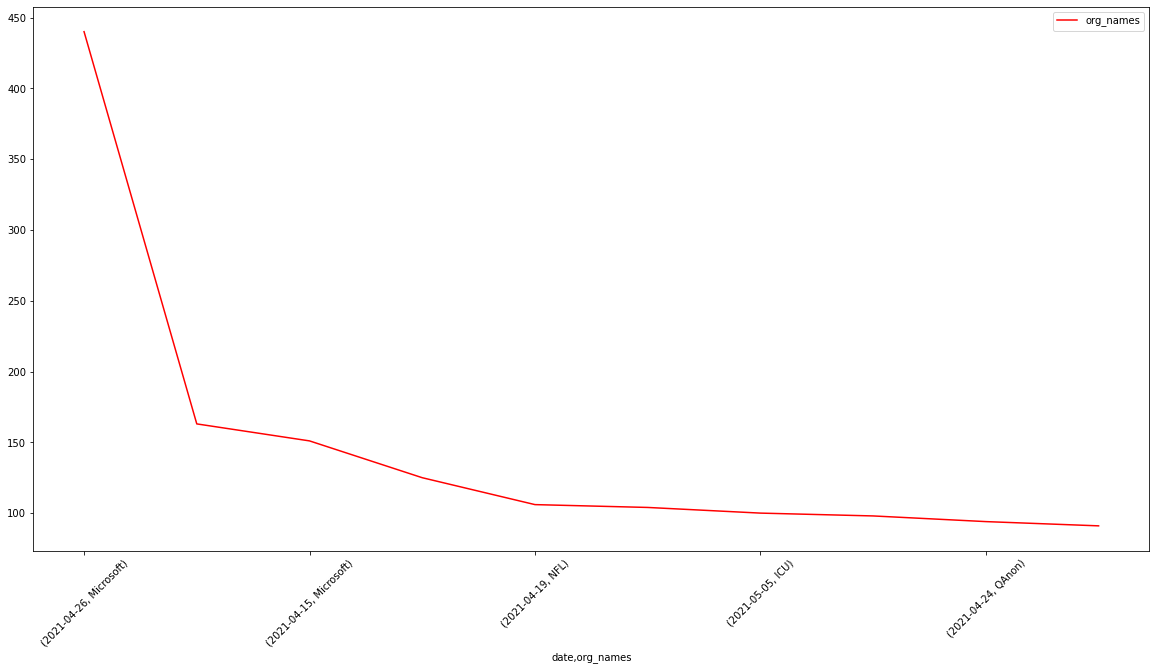

In [32]:
org_frame = df5.groupby(['date','org_names'])['org_names'].count().sort_values(ascending=False)[:10].to_frame()
org_frame.plot(color="red")
plt.xticks(rotation = 45)

In [33]:
org_frame

,,org_names
date,org_names,
2021-04-26,Microsoft,440
2021-04-21,EU,163
2021-04-15,Microsoft,151
2021-04-26,NASA,125
2021-04-19,NFL,106
2021-05-01,CIA,104
2021-05-05,ICU,100
2021-05-10,Microsoft,98
2021-04-24,QAnon,94


array([<AxesSubplot:title={'center':'(org_names, 2021-04-26)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-04-21)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-04-15)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-04-19)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-05-01)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-05-05)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-05-10)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-04-24)'}, xlabel='org_names'>,
       <AxesSubplot:title={'center':'(org_names, 2021-05-04)'}, xlabel='org_names'>],
      dtype=object)

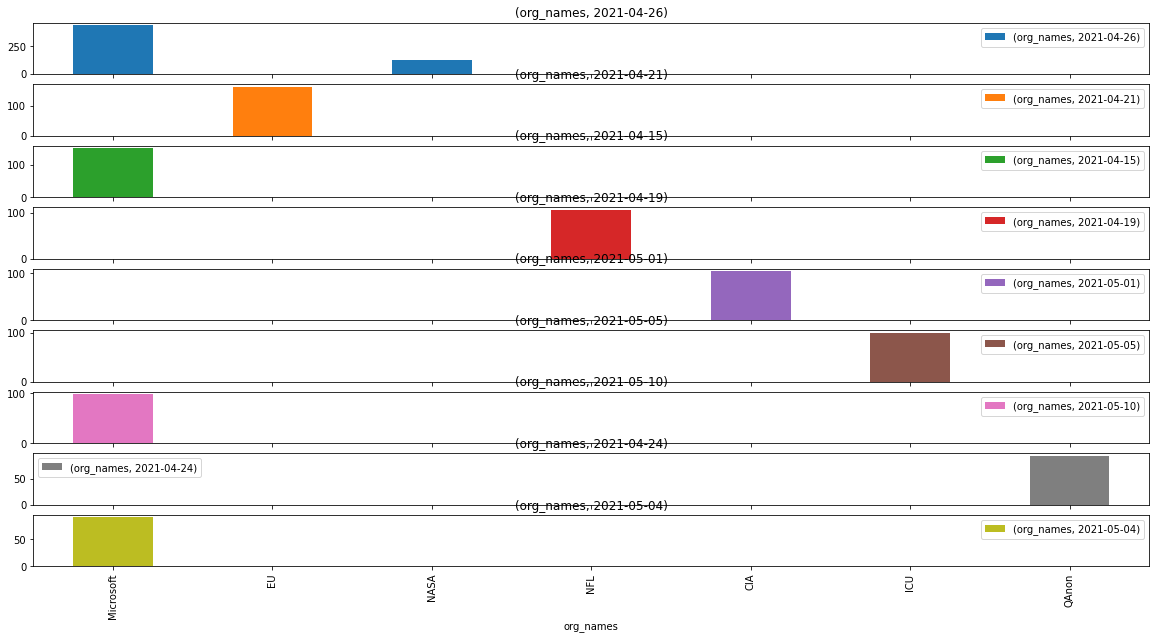

In [34]:
org_frame.unstack(level=0).plot(kind='bar', subplots=True)

array([<AxesSubplot:xlabel='org_names'>, <AxesSubplot:xlabel='org_names'>,
       <AxesSubplot:xlabel='org_names'>, <AxesSubplot:xlabel='org_names'>,
       <AxesSubplot:xlabel='org_names'>, <AxesSubplot:xlabel='org_names'>,
       <AxesSubplot:xlabel='org_names'>, <AxesSubplot:xlabel='org_names'>,
       <AxesSubplot:xlabel='org_names'>], dtype=object)

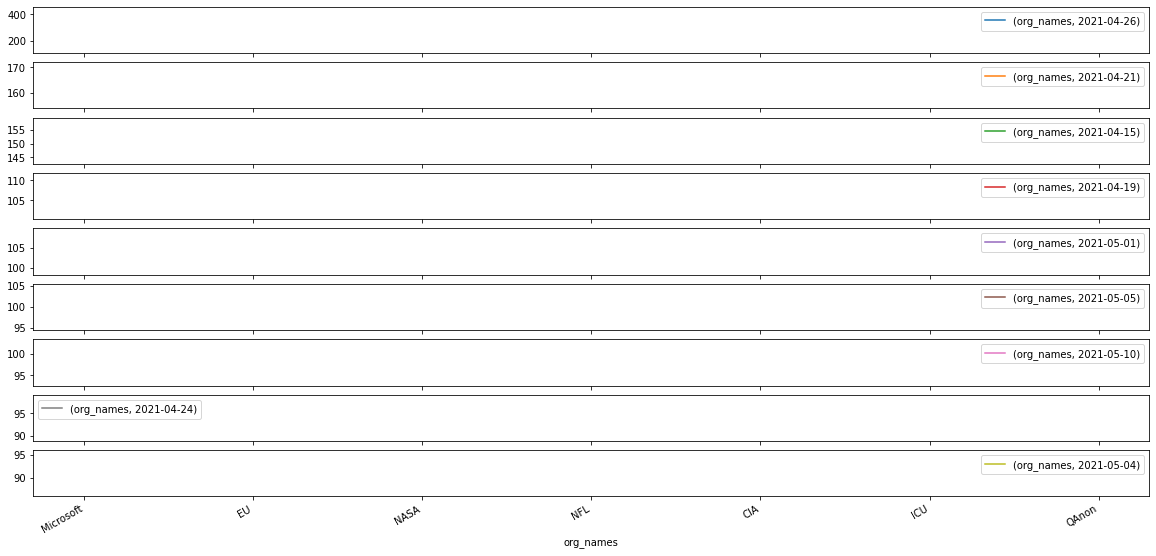

In [35]:
org_frame.unstack(level=0).plot(kind='line', subplots=True)

<h4>Get Nouns from the data that's given us in "Sent" column.</h4>

In [36]:
noun_list = []
lines = df3['Sent']
for i in lines:
    # function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN'
    # do the nlp stuff
    tokenized = nltk.word_tokenize(i)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)]
    noun_list.append(nouns)

In [37]:
df3['nouns'] = noun_list

In [38]:
df3.head()

,Sent,Len,date,person_names,org_names,nouns
0,India is experiencing the world worst coronav...,8,2021-04-28,[],[],"[India, world, coronavirus, outbreak]"
1,The country has had more than 17,7,2021-04-28,[],[],[country]
2,6 million cases since the pandemic began last ...,9,2021-04-28,[],[],"[cases, pandemic, year]"
3,But experts fear the the real number could be...,14,2021-04-28,[],[],"[experts, number, times]"
4,Grieving families are struggling to keep them...,33,2021-04-28,[],[],"[families, ones, health, care, system, workers..."


In [39]:
df4 = df3[ ~ (df3['nouns'].astype(str) == '[]') & ~ (df3['nouns'].astype(str) == '*')]
df5 = df4.drop(4180).reset_index(drop=True)

In [40]:
df5.head()

,Sent,Len,date,person_names,org_names,nouns
0,India is experiencing the world worst coronav...,8,2021-04-28,[],[],"[India, world, coronavirus, outbreak]"
1,The country has had more than 17,7,2021-04-28,[],[],[country]
2,6 million cases since the pandemic began last ...,9,2021-04-28,[],[],"[cases, pandemic, year]"
3,But experts fear the the real number could be...,14,2021-04-28,[],[],"[experts, number, times]"
4,Grieving families are struggling to keep them...,33,2021-04-28,[],[],"[families, ones, health, care, system, workers..."


In [41]:
# create a dataframe containing sentences and it's total len
df6 = pd.DataFrame(columns=['date','nouns'])

row_list = []

for i in range(len(df5)):
    for nouns in df5.loc[i,'nouns']:
        date = df5.loc[i,'date']
        dict1 = {'nouns':nouns,'date':date}
        row_list.append(dict1)
    
df6 = pd.DataFrame(row_list)

In [42]:
df6.head()

,nouns,date
0,India,2021-04-28
1,world,2021-04-28
2,coronavirus,2021-04-28
3,outbreak,2021-04-28
4,country,2021-04-28


(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(-2.0, 0, '(2021-04-26, Photos)'),
  Text(0.0, 0, '(2021-04-26, coronavirus)'),
  Text(2.0, 0, '(2021-04-24, coronavirus)'),
  Text(4.0, 0, '(2021-04-14, •)'),
  Text(6.0, 0, '(2021-04-24, Hide)'),
  Text(8.0, 0, '(2021-04-26, Photos)'),
  Text(10.0, 0, '')])

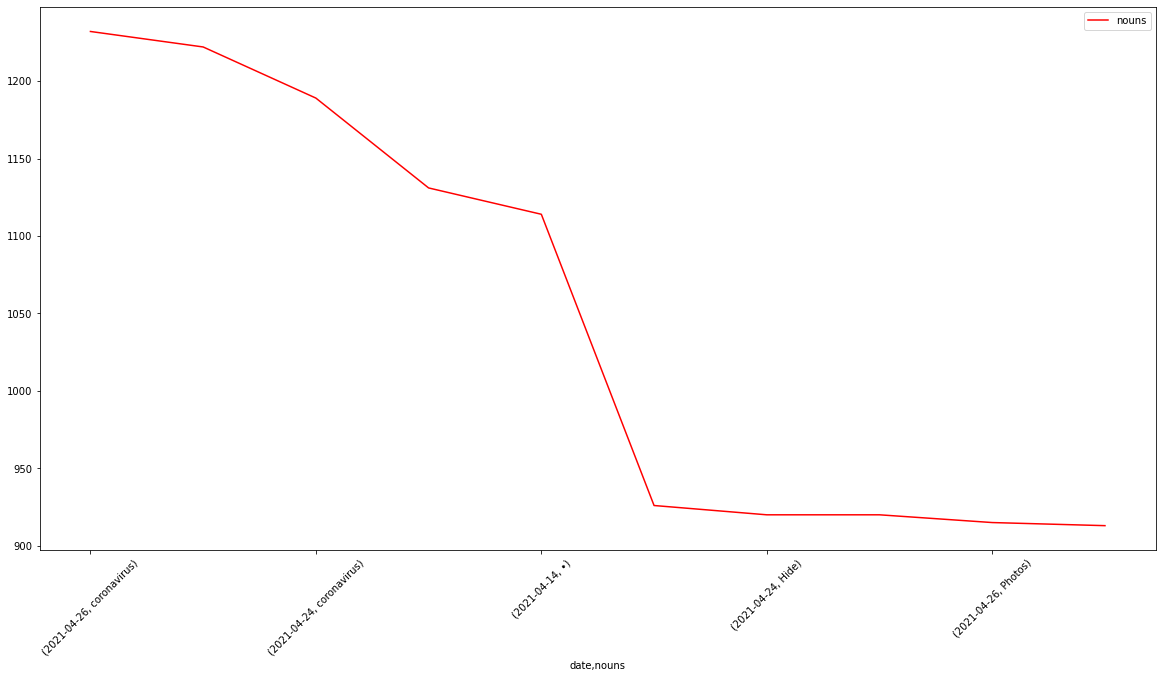

In [43]:
noun_frame = df6.groupby(['date','nouns'])['nouns'].count().sort_values(ascending=False)[:10].to_frame()
noun_frame.plot(color='red')
plt.xticks(rotation = 45)

In [46]:
noun_frame

nouns
date       nouns             
2021-04-26 coronavirus   1232
2021-04-23 coronavirus   1222
2021-04-24 coronavirus   1189
2021-04-27 coronavirus   1131
2021-04-14 •             1114
2021-04-24 Photos         926
           Hide           920
           Caption        920
2021-04-26 Photos         915
           Hide           913

array([<AxesSubplot:title={'center':'(nouns, 2021-04-26)'}, xlabel='nouns'>,
       <AxesSubplot:title={'center':'(nouns, 2021-04-23)'}, xlabel='nouns'>,
       <AxesSubplot:title={'center':'(nouns, 2021-04-24)'}, xlabel='nouns'>,
       <AxesSubplot:title={'center':'(nouns, 2021-04-27)'}, xlabel='nouns'>,
       <AxesSubplot:title={'center':'(nouns, 2021-04-14)'}, xlabel='nouns'>],
      dtype=object)

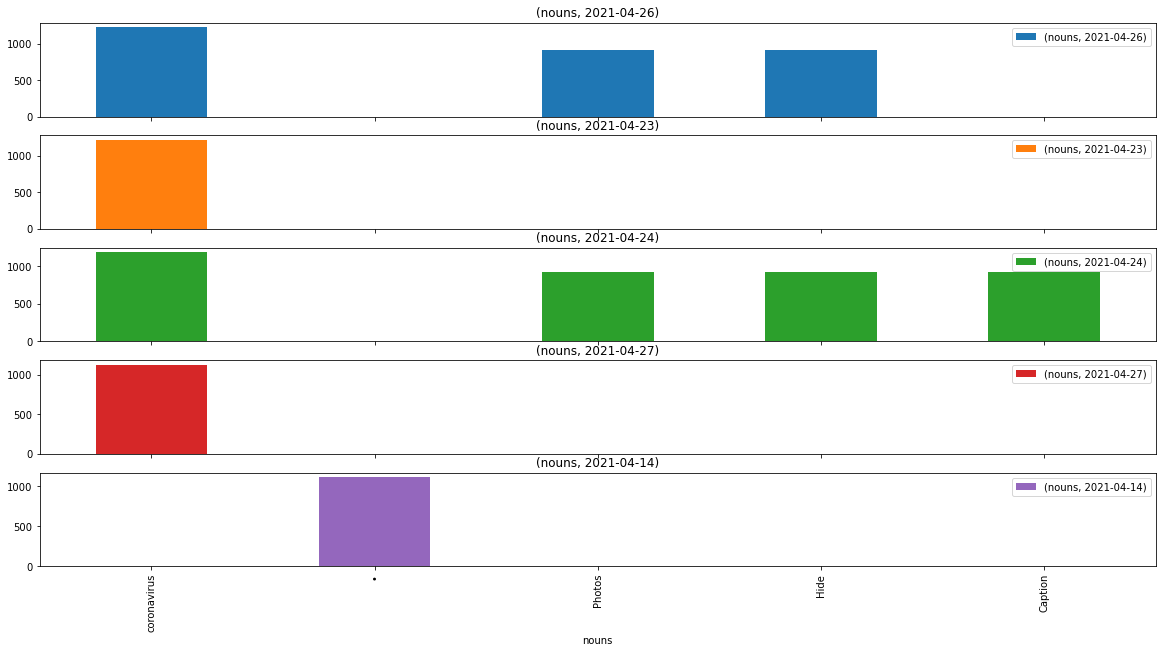

In [44]:
noun_frame.unstack(level=0).plot(kind='bar', subplots=True)

array([<AxesSubplot:xlabel='nouns'>, <AxesSubplot:xlabel='nouns'>,
       <AxesSubplot:xlabel='nouns'>, <AxesSubplot:xlabel='nouns'>,
       <AxesSubplot:xlabel='nouns'>], dtype=object)

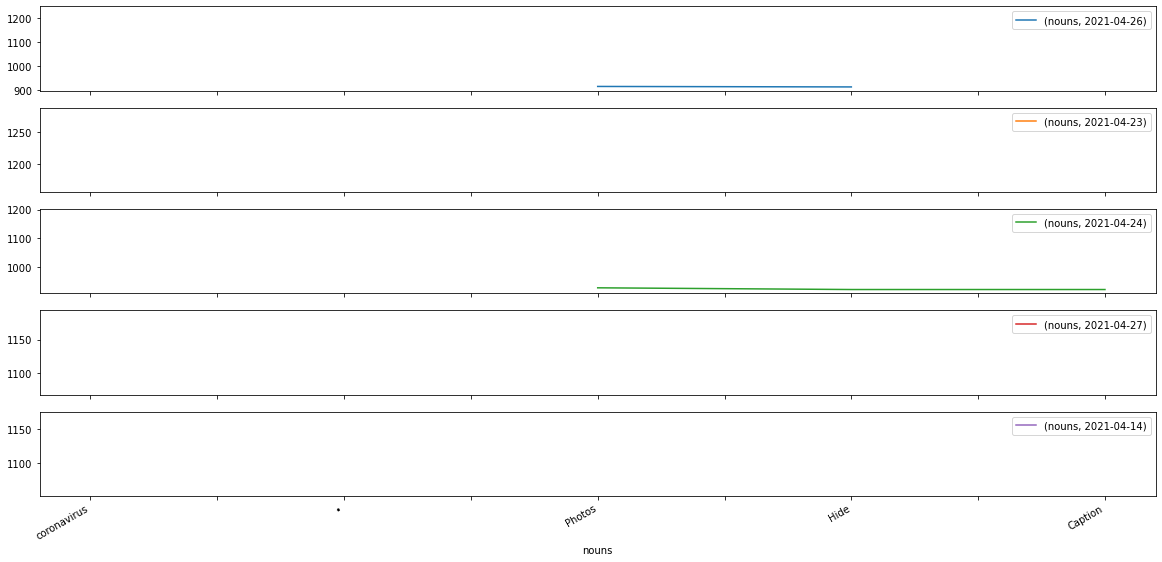

In [45]:
noun_frame.unstack(level=0).plot(kind='line', subplots=True)